<a href="https://colab.research.google.com/github/Gabriellrs/deteccaoDeTransacaoFraudulenta/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

## Definição do Problema

Queremos construir um modelo que identifique transações potencialmente fraudulentas com base em características como valor, tempo e outras variáveis associadas às transações.

## Objetivo

Criar um modelo preditivo para detectar fraudes em transações financeiras.

## Resultados Esperados

Um modelo com boa performance que possa ser aplicado para alertar sobre fraudes em tempo real.

## Conjunto de Dados Utilizado







Vamos preparar o conjunto para trabalharmos com ele, vou utilizar o kaggle!

In [ ]:
!pip install kaggle

Instala a biblioteca kaggle, que permite acessar e baixar datasets diretamente do Kaggle, é necessário pq o Kaggle fornece uma API para interagir com os dados, mas você precisa da biblioteca para usá-la.


In [ ]:
# Autenticação no Kaggle
from google.colab import files
files.upload()  # Pede pra escolher um ficheiro, vamos selecionar o kaggle.json que baixamos

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabrielrodrigu3s","key":"fe928c1e99e63958dbb6df369a784b35"}'}

files.upload() abre uma interface para fazer upload de arquivos do computador para o ambiente Colab.

O arquivo kaggle.json contém as credenciais da sua conta no Kaggle para autenticação.



In [ ]:
# Configurando o Kaggle no Colab
!mkdir ~/.kaggle

# Cria um diretório oculto chamado .kaggle no sistema do Colab.

!cp kaggle.json ~/.kaggle/

# Copia o arquivo kaggle.json que você fez o upload para o diretório .kaggle.

!chmod 600 ~/.kaggle/kaggle.json

# Altera as permissões do arquivo kaggle.json para que apenas o dono possa lê-lo e escrevê-lo.

# Baixando o dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Usa a API do Kaggle para baixar o dataset "Credit Card Fraud Detection" identificado pelo ID mlg-ulb/creditcardfraud.

!unzip creditcardfraud.zip

# Descompacta o arquivo ZIP baixado, que contém o dataset em formato CSV.

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
100% 66.0M/66.0M [00:03<00:00, 31.1MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.6MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## Etapa de Exploração e Limpeza de Dados

In [ ]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("creditcard.csv")

# Essa função carrega o dataset no formato CSV para um DataFrame, que é uma estrutura tabular usada no pandas.

# Exibir as 5 primeiras linhas do dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Observações

### Qual o tamanho do DataSet ?

In [ ]:
df.shape # Retorna uma tupla com o número de linhas e colunas

(284807, 31)

### Indentificar valores ausentes ou inconsistentes

In [ ]:
df.isnull().sum() # Soma o número de valores NaN (não preenchidos) em cada coluna.

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Se encontrar valores ausentes, usamos técnicas como:

- Preenchê-los com a média/mediana.

- Remover linhas ou colunas inteiras, dependendo da situação.

Mas não é o nosso caso aqui :)

### Qual o significado de cada coluna ?

Como as colunas foram anonimizadas, aqui está uma breve descrição:

**V1 a V28:** Componentes resultantes de uma Análise de Componentes Principais (PCA) para anonimizar os dados.

**Time:** Tempo em segundos desde a primeira transação no dataset.

**Amount:** Valor da transação.

**Class:**

**0:** Transação normal.

**1:** Transação fraudulenta.

In [ ]:
# Para obter estatísticas básicas (média, desvio padrão, mínimo, máximo), usamos:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Vamos interpretar os dados até agora !

**count**

**O que é:** Número total de valores não nulos em cada coluna.

**O que indica:** Se o número em uma coluna for menor que o total de linhas do dataset (ex.: 284807), temos valores ausentes.

No nosso caso, todas as colunas possuem 284.807 valores, ou seja, sem valores ausentes.

**mean**

**O que é:** Média aritmética dos valores da coluna.

**O que indica:** O "valor típico" da coluna. Útil para colunas como Amount (valor das transações) para entender o ticket médio.

No nosso caso, Amount tem média 88.349, o que significa que o valor médio das transações é de 88.349 unidades monetárias (provavelmente dólares).

**std (desvio padrão)**

**O que é:** Mede a dispersão dos valores em relação à média.

**O que indica:** Quanto os dados variam. Um std alto indica maior variabilidade; um baixo, indica que os dados estão mais próximos da média.

O valor das transações variam bastante, com um desvio padrão de 250.

**min**

**O que é:** O menor valor da coluna.

**O que indica:** O limite inferior dos dados. Ajuda a detectar possíveis valores inválidos.

Há transações cujo valor é 0 (normal em alguns contextos, como transações promocionais).

**25%, 50% (median), 75%**

**O que são:** Percentis. Dividem os dados em quatro partes iguais.

**25% (primeiro quartil):** 25% das transações têm valor abaixo desse número.

**50% (mediana):** Metade das transações têm valor abaixo desse número.

**75% (terceiro quartil):** 75% das transações têm valor abaixo desse número.

**O que indicam:** Como os dados estão distribuídos.

Considerando que a unidade monetária é o dolar:

25% das transações são menores que $5.60.

50% (a mediana) são menores que $22.

Apenas 25% são maiores que $77.

**max**

**O que é:** O maior valor da coluna.

**O que indica:** O limite superior dos dados. Ajuda a identificar outliers (valores fora do padrão).

Há uma transação no dataset que custa $25.691.

### O que devemos observar aqui ?

**Valores inconsistentes:**

- Exemplo: Amount com valores negativos (não faz sentido para transações).

- Desvios-padrão muito altos (outliers).

**Transações com valor zero (Amount):**

- Podem representar situações especiais, como promoções, devoluções ou erros de processamento. É importante analisar se estão relacionadas a fraudes ou não.

**Distribuição do tempo (Time):**

- Essa coluna representa o tempo decorrido desde a primeira transação. Pode ser útil para observar padrões temporais, como:
  - Fraudes ocorrem em horários específicos (ex.: madrugada)?
  - Existe um agrupamento de fraudes em períodos curtos (indicando ataques direcionados)?

**Insights úteis:**

- A maioria das transações tem valores baixos (mediana de $22).
- Há valores extremos que podem ser outliers legítimos ou fraudes.

### Análise da Distribuição de Classes

In [ ]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


- df['Class']: Seleciona a coluna Class do DataFrame.

- value_counts(): Conta quantas vezes cada valor aparece nessa coluna (fraudes e não fraudes).

- normalize=True: Calcula as proporções em vez de valores absolutos, mostrando o percentual de cada classe.

- Por que isso importa?: Identificamos se o dataset está desbalanceado e precisamos ajustar isso antes de treinar modelos.

### Análise da Distribuição de Amount e Time

<Axes: >

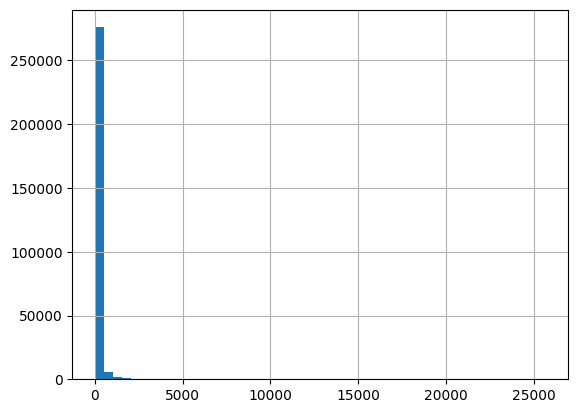

In [ ]:
df['Amount'].hist(bins=50)

- df['Amount']: Seleciona a coluna Amount com os valores das transações.

- .hist(bins=50): Cria um histograma com 50 intervalos (bins), mostrando a frequência de valores em cada faixa.

- Por que isso importa?: Ajuda a entender como os valores de transação estão distribuídos. Grandes concentrações podem indicar comportamento comum, enquanto outliers podem sinalizar suspeitas.

<Axes: >

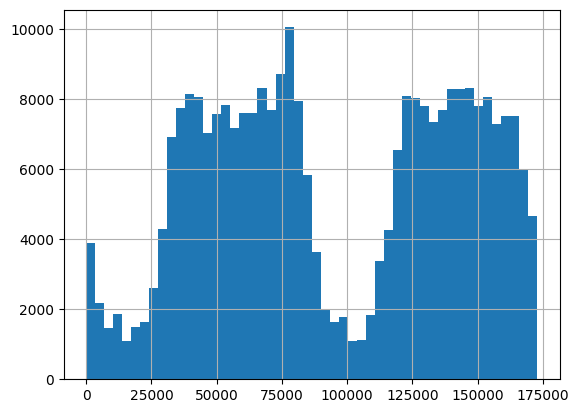

In [ ]:
df['Time'].hist(bins=50)

- df['Time']: Seleciona a coluna Time com os tempos das transações.

- Por que isso importa?: Verificamos se há padrões temporais, como horários mais propensos a fraudes.

### Explorar Outliers

<Axes: xlabel='Amount'>

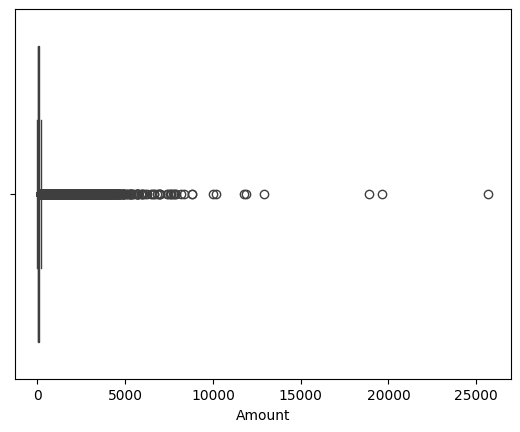

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Amount'])

- import seaborn as sns: Importa a biblioteca Seaborn para criar gráficos mais sofisticados.

- sns.boxplot(): Cria um boxplot, que mostra a distribuição de dados, os limites (quartis) e os outliers.

- x=df['Amount']: Plota a coluna Amount no eixo X.

- Por que isso importa?: Identificamos valores extremos que podem distorcer os modelos ou indicar comportamento fraudulento.

<Axes: xlabel='Class', ylabel='Amount'>

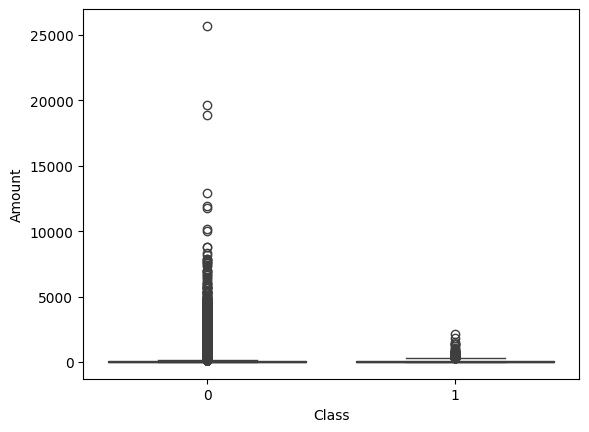

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)

- x='Class', y='Amount': Compara a distribuição de Amount para cada classe (Class = 0 ou 1).

- data=df: Diz que os dados vêm do DataFrame df.

- Por que isso importa?: Mostra diferenças de comportamento entre fraudes e transações normais.

### Relação Entre Amount, Time, e Class

<Axes: xlabel='Time', ylabel='Amount'>

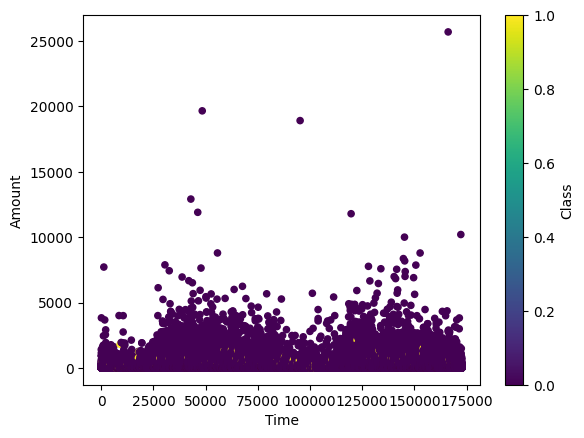

In [ ]:
df.plot.scatter(x='Time', y='Amount', c='Class', colormap='viridis')

- plot.scatter(): Cria um gráfico de dispersão.

- x='Time' e y='Amount': Coloca o tempo no eixo X e o valor das transações no eixo Y.

- c='Class': Usa a classe (Class) como cor para diferenciar fraudes de transações normais.

- colormap='viridis': Aplica uma paleta de cores para destacar as diferenças.

- Por que isso importa?: Visualizamos como Time e Amount se relacionam com fraudes, procurando padrões como aglomerações ou transações incomuns.

### Melhorando a Vizualização

A variável Class = 1 representa uma pequena fração dos dados.

Em gráficos de dispersão padrão, esses pontos podem ser "engolidos" pela grande quantidade de pontos de transações normais (Class = 0).

Vamos destacar as fraudes no gráfico:

Ajustando o tamanho dos pontos:

<Axes: xlabel='Time', ylabel='Amount'>

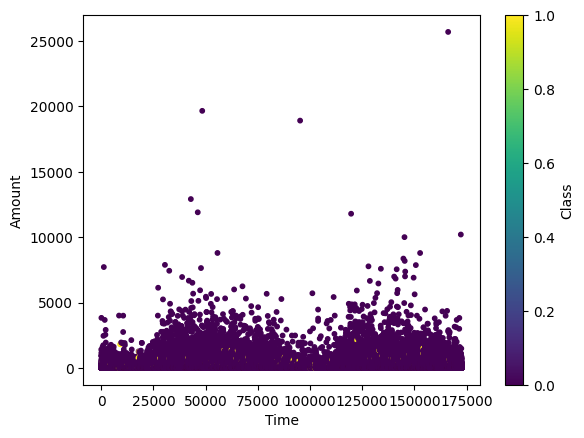

In [ ]:
df.plot.scatter(x='Time', y='Amount', c='Class', colormap='viridis', s=10)

Não ajudou muito, vamos tentar separar as classes:

<Axes: xlabel='Time', ylabel='Amount'>

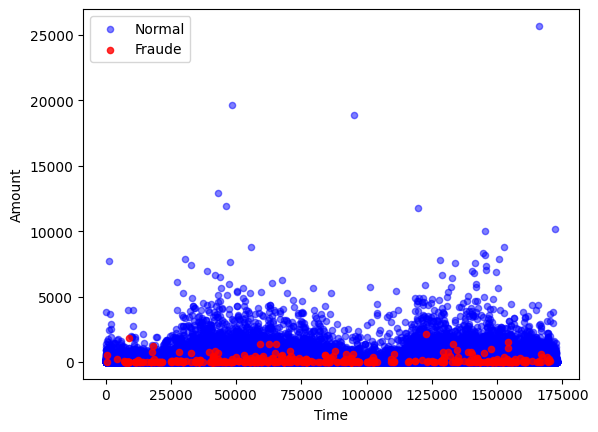

In [ ]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

ax = df_normal.plot.scatter(x='Time', y='Amount', color='blue', label='Normal', alpha=0.5)
df_fraud.plot.scatter(x='Time', y='Amount', color='red', label='Fraude', alpha=0.8, ax=ax)

- alpha: Ajusta a transparência para lidar com a sobreposição de pontos.

- Diferentes cores: Destacamos fraudes em vermelho.

Agora filtrando para exibir apenas um subconjunto dos dados (os primeiros 10.000)

<Axes: xlabel='Time', ylabel='Amount'>

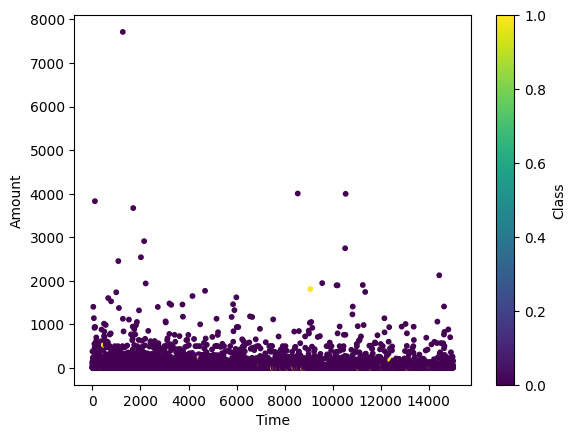

In [ ]:
subset = df.iloc[:10000]
subset.plot.scatter(x='Time', y='Amount', c='Class', colormap='viridis', s=10)

# Limpeza e Preparação de Dados

### Tratar Outliers

Já observamos na análise exploratória que Amount tem grande variação. Vamos verificar estatisticamente se há outliers extremos:

In [ ]:
import numpy as np

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))).sum()
print(f"Número de outliers em Amount: {outliers}")

Número de outliers em Amount: 31904


Por que não remover os outliers?

- Fraudes geralmente se destacam como "outliers" no dataset.

  - Transações fraudulentas podem ter valores atípicos, como valores altos ou padrões incomuns.

- Remover esses dados pode fazer com que o modelo não consiga aprender a identificar fraudes.

A melhor abordagem é transformar as variáveis para reduzir a influência dos outliers enquanto mantém as informações úteis.

- a) Aplicar Transformação Logarítmica

Reduzimos a escala dos valores e tornamos os dados mais uniformes para os modelos:

In [ ]:
import numpy as np

df['log_amount'] = np.log1p(df['Amount'])  # log1p(x) = log(1 + x), evita problemas com valores 0

Padronizar os Valores

- Além da transformação logarítmica, podemos escalar os dados para que todas as variáveis estejam na mesma magnitude:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializando o escalonador
scaler = StandardScaler()

# Escalonando 'log_amount' e 'Time'
df['scaled_log_amount'] = scaler.fit_transform(df['log_amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))


Após as transformações, podemos remover as versões originais de Amount e Time:

In [ ]:
# Remover as colunas originais 'Amount' e 'Time'
df = df.drop(['Amount', 'Time'], axis=1)

# Vizualização dos Dados Pós Limpeza

Vamos verificar se a transformação logarítmica ajudou a reduzir a variação.

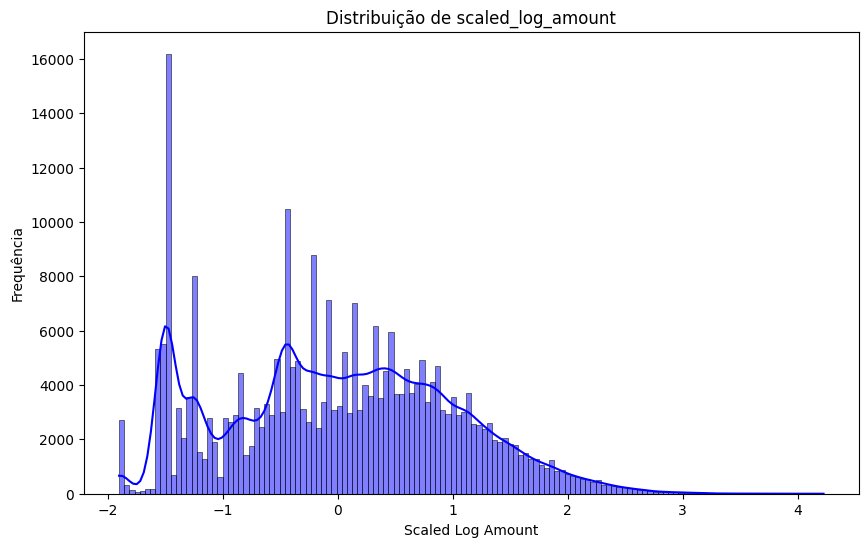

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a distribuição de 'scaled_log_amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['scaled_log_amount'], kde=True, color='blue')
plt.title('Distribuição de scaled_log_amount')
plt.xlabel('Scaled Log Amount')
plt.ylabel('Frequência')
plt.show()

O escalonamento do Time foi eficaz ?

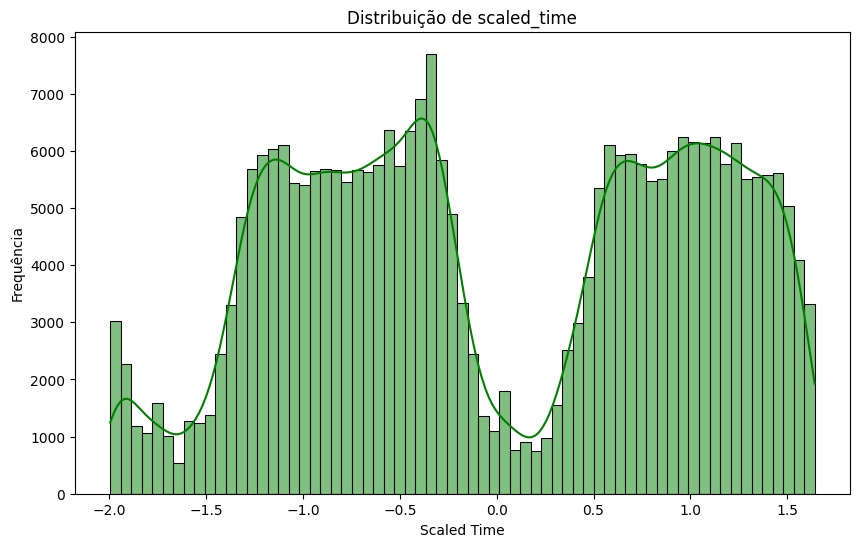

In [ ]:
# Visualizando a distribuição de 'scaled_time'
plt.figure(figsize=(10, 6))
sns.histplot(df['scaled_time'], kde=True, color='green')
plt.title('Distribuição de scaled_time')
plt.xlabel('Scaled Time')
plt.ylabel('Frequência')
plt.show()


**Relação entre scaled_log_amount e Class (fraude vs não fraude):**

- Aqui, queremos visualizar como as transações fraudulentas se comportam em relação ao valor da transação.

<ipython-input-24-91d722501fcb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='scaled_log_amount', data=df, palette='Set2')


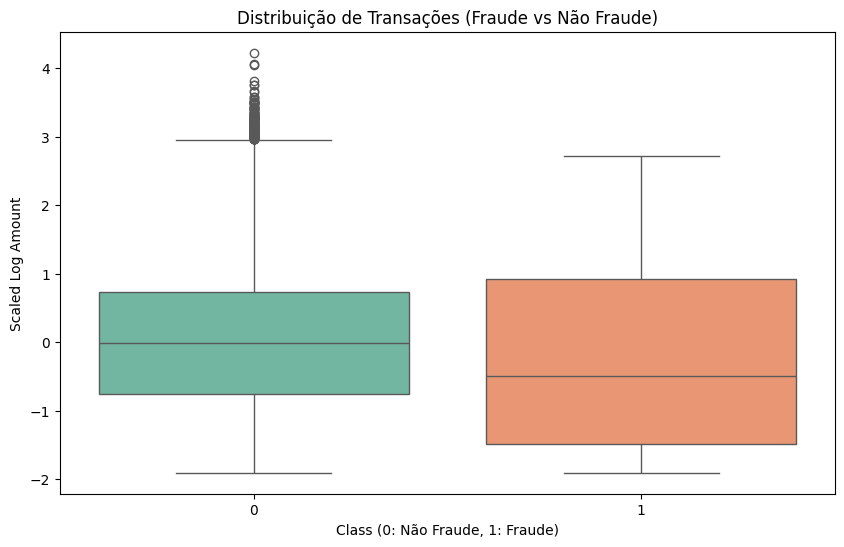

In [ ]:
# Relação entre 'scaled_log_amount' e 'Class' (fraude vs não fraude)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='scaled_log_amount', data=df, palette='Set2')
plt.title('Distribuição de Transações (Fraude vs Não Fraude)')
plt.xlabel('Class (0: Não Fraude, 1: Fraude)')
plt.ylabel('Scaled Log Amount')
plt.show()

### Considerações

A distribuição de scaled_log_amount nos diz como as transações foram transformadas após a aplicação do logaritmo e escalonamento. Com isso, podemos observar:

**Se a distribuição ficou mais equilibrada:**

- Antes da transformação, Amount provavelmente tinha uma grande dispersão, com alguns valores extremamente grandes (outliers). O logaritmo tende a reduzir essa dispersão.
- Após a transformação, o gráfico deve mostrar uma distribuição mais concentrada, o que facilita o treinamento do modelo.

**Se há assimetria ou picos:**

- Se o gráfico mostrar uma assimetria acentuada ou se ainda houver um pico (por exemplo, um grande número de transações de valor muito pequeno), isso pode indicar que as transações de valor baixo são predominantes.

A distribuição de scaled_time mostrará como o tempo foi transformado. O que procuramos aqui é:

**Se o tempo está bem escalonado:**

- A escala padrão deve fazer com que os valores de tempo se ajustem para uma distribuição mais uniforme, facilitando a comparação com outras variáveis.
- Se houver algum comportamento de "clustering" (valores agrupados em intervalos específicos de tempo), isso pode indicar padrões interessantes (por exemplo, fraudes ocorrendo mais frequentemente em determinados horários).

**Se há assimetria ou picos:**

- Se houver muitos valores de tempo próximos ao início do dataset (valores baixos de scaled_time), pode ser uma indicação de que as transações estão mais concentradas em determinados períodos do dia ou da semana.

**Relação entre scaled_log_amount e Class (fraude vs não fraude)**

Esse gráfico é essencial para entender como as transações fraudulentas se comportam em comparação com as transações legítimas:

**Se há diferença clara entre as classes:**

- Se os boxplots de scaled_log_amount para transações legítimas (Class = 0) e fraudulentas (Class = 1) forem muito diferentes, isso pode indicar que as **transações fraudulentas tendem a ter valores significativamente mais altos ou mais baixos.** Por exemplo, fraudes podem estar associadas a valores extremos (muito altos ou muito baixos).

**Se as transações fraudulentas têm uma maior variação:**

- Se as transações fraudulentas (valor Class = 1) apresentarem uma maior dispersão ou outliers, isso pode indicar que as fraudes não seguem um padrão simples de valor — podem ter valores que se distendem mais do que as transações legítimas.
Se há sobreposição entre as classes:

- Se as distribuições de scaled_log_amount entre as transações fraudulentas e não fraudulentas se sobrepuserem muito, isso pode sugerir que a variável Amount não é suficientemente boa para distinguir fraudes apenas com base em seu valor. Isso é comum, pois fraudes podem ocorrer em valores de transações muito variados.

### Resumo dos Insigths


- Transformações bem-sucedidas: Se os gráficos de distribuição de scaled_log_amount e scaled_time mostrarem distribuições mais simétricas e equilibradas, as transformações foram eficazes.

- Padrões de fraudes: Se a visualização de scaled_log_amount versus Class mostrar que fraudes tendem a ter valores mais extremos ou variabilidade maior, isso é uma boa indicação de que o valor da transação pode ser um bom indicador para a detecção de fraudes.

# Preparação do Modelo

**Passos da Preparação para Modelagem**

- Definir o alvo (target) e as variáveis preditoras (features):

  - Nosso alvo é a coluna Class (0 = não fraude, 1 = fraude).
  - As variáveis preditoras são todas as outras colunas restantes no dataset.

- Dividir os dados em treino e teste:

  - Dividimos o dataset em duas partes:
    - **Treino:** Usado para treinar o modelo.
    - **Teste:** Usado para avaliar o desempenho do modelo em dados não vistos.
  - Normalmente, usamos **80% para treino e 20% para teste.**

- Lidar com desbalanceamento de classes (opcional, mas importante):

  - Em muitos datasets de fraudes, há muito mais transações legítimas (Class = 0) do que fraudulentas (Class = 1).
  - Técnicas comuns para lidar com isso incluem:
    - Oversampling da classe minoritária (SMOTE): Aumentar os exemplos de fraudes.
    - Class Weight: Configurar pesos para o modelo dar mais importância à classe minoritária.

- Escalonar os dados (se necessário):

  - Já escalonamos as colunas log_amount e time, mas garantimos que todas as features estejam na mesma escala.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Separar o alvo e as variáveis preditoras
X = df.drop('Class', axis=1)  # Todas as variáveis menos 'Class'
y = df['Class']  # Alvo

# 2. Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Aplicar o oversampling (SMOTE) para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Confirmar a proporção das classes após o oversampling
from collections import Counter
print("Distribuição de Classes no Conjunto de Treino Antes:", Counter(y_train))
print("Distribuição de Classes no Conjunto de Treino Depois:", Counter(y_train_resampled))


Distribuição de Classes no Conjunto de Treino Antes: Counter({0: 227451, 1: 394})
Distribuição de Classes no Conjunto de Treino Depois: Counter({0: 227451, 1: 227451})


# Treinamento do Modelo

O modelo que eu escolhi para esse dataset é o **Random Forest**, que é robusta pra classificação e lida bem com datasets desbalanceados

Por que esse modelo é bom para detecção de fraudes ?

Capacidade de lidar com dados desbalanceados:

- Fraudes são raras (classe minoritária).
- Random Forest é menos sensível ao desbalanceamento porque divide os dados em várias amostras e permite o uso de técnicas como SMOTE para balancear.

Lida bem com grandes datasets e muitas variáveis:

- Nosso dataset tem muitas features (30). O Random Forest pode usar subconjuntos aleatórios delas para evitar overfitting e melhorar a eficiência.

Resistente a outliers:

- Outliers em alguns dados não têm muito impacto porque são diluídos no conjunto de árvores.

Detecção de padrões complexos:

- Fraudes envolvem relações não-lineares e padrões sutis. O Random Forest captura bem essas interações.

Interpretação e explicabilidade:

- Podemos analisar importância de features (ex.: quais variáveis mais impactam na detecção de fraude), o que é útil para entender o comportamento do modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# 2. Treinar o modelo nos dados balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# 3. Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# 4. Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.9976299989466662

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.86      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962


Matriz de Confusão:
 [[56743   121]
 [   14    84]]


# Interpretação dos Resultados

**Acurácia: 0.9976 (~99,76%)**

- Isso significa que 99,76% das previsões do modelo estão corretas.

**Relatório de Classificação**

- O relatório nos dá três métricas principais por classe:
  - Classe 0 (Transações legítimas):
    - Precision (1.00): O modelo classificou todas as instâncias previstas como "legítimas" corretamente.
    - Recall (1.00): O modelo identificou quase todas as transações legítimas no dataset.
    - F1-score (1.00): Combinação ideal de precisão e recall para a classe 0.
  - Classe 1 (Fraudes):

    - Precision (0.41): Apenas 41% das transações previstas como fraudes eram realmente fraudes.
    - Recall (0.86): O modelo detectou 86% das fraudes reais.
    - F1-score (0.55): Considerando precisão e recall, o desempenho geral na classe de fraudes é mediano.

  - Macro Average:

    - Média simples entre as classes.
    - Precision (0.70), Recall (0.93) e F1-score (0.78) mostram que a classe minoritária impacta negativamente no desempenho geral.
  - Weighted Average:

    - Média ponderada pelas proporções das classes.
    - Aqui, a classe majoritária domina, resultando em métricas próximas de 1.

**Matriz de Confusão**

- Estrutura
  - [[TN, FP],

    [FN, TP]]

- TN (56743): Transações legítimas corretamente classificadas.
- FP (121): Transações legítimas classificadas incorretamente como fraudes.
- FN (14): Fraudes reais que o modelo não conseguiu identificar.
- TP (84): Fraudes corretamente identificadas.

- O modelo identificou 84 das 98 fraudes corretamente, mas errou em 14 casos.
- Gerou 121 falsos positivos, o que significa que 121 transações legítimas foram tratadas como fraudes, possivelmente gerando custos operacionais.

**Insights**

Pontos fortes:

- O modelo é muito eficiente para detectar transações legítimas (Recall de 1.00 para a classe 0).
- Detectou uma boa proporção de fraudes (Recall de 0.86 para a classe 1).

Pontos fracos:

- Baixa precisão para fraudes (0.41): Mais de 50% das previsões de fraude estavam incorretas.
- Falsos positivos (121) podem causar transtornos para clientes legítimos.

Conclusão inicial:

O modelo é útil para identificar fraudes, mas ainda precisa de ajustes para melhorar a precisão e reduzir falsos positivos.

# Próximos Passos

Em breve vou fazer uma comparação entre esse modelo ajustado (explorando hiperparâmetros para melhorar a precisão) com outros tipos de modelos e documentar o processo aqui !

Mas por enquanto o meu muito obrigado, espero que tenhamos a